In [1]:
# Shiyi (Amy) Qin and Victor Z
# UW-Madison, 2020
# images are matrices

## Start here if working on google collab

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [7]:
# Specify mean and covariance
mu = [0, 0]
Sigma = [[1, 0], [0, 1]]  # no correlation

# Evaluate probability density function in domain(-3,3 and -3,3)
seed = 2024
np.random.seed(seed)
nmesh = 10
x1 = np.linspace(-3, 3, nmesh)
x2 = np.linspace(-3, 3, nmesh)
X1, X2 = np.meshgrid(x1, x2)  # create mesh
pos = np.dstack((X1, X2))
F = multivariate_normal(mu, Sigma).pdf(pos)
F = 100 * F
Fc = np.clip(F, 0, 255).astype(np.uint8)

Rank of Fc: 3
Rank of F2c: 9


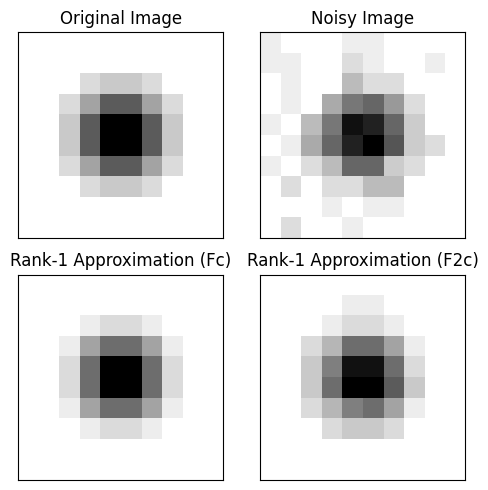

In [8]:
# Plot pdf and confidence interval
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

C = np.linspace(0.99, 0.0, 64)
C = np.stack([C, C, C], axis=1)
cmap = plt.cm.gray_r

axes[0, 0].imshow(Fc, cmap=cmap)
axes[0, 0].set_title('Original Image')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# Add noise
F2 = F + np.random.normal(0, 1, (10, 10))
F2c = np.clip(F2, 0, 255).astype(np.uint8)

axes[0, 1].imshow(F2c, cmap=cmap)
axes[0, 1].set_title('Noisy Image')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# Compute rank of matrices
rank_Fc = np.linalg.matrix_rank(Fc)
rank_F2c = np.linalg.matrix_rank(F2c)

print(f'Rank of Fc: {rank_Fc}')
print(f'Rank of F2c: {rank_F2c}')

# Compute SVD of matrices
U, S, Vt = np.linalg.svd(Fc)
U2, S2, Vt2 = np.linalg.svd(F2c)

# Compute rank-1 approximation of Fc
D = np.dot(U[:, :1], np.dot(np.diag(S[:1]), Vt[:1, :]))
D = D.astype(np.uint8)

axes[1, 0].imshow(D, cmap=cmap)
axes[1, 0].set_title('Rank-1 Approximation (Fc)')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# Compute rank-1 approximation of F2c
D2 = np.dot(U2[:, :1], np.dot(np.diag(S2[:1]), Vt2[:1, :]))
D2 = D2.astype(np.uint8)

axes[1, 1].imshow(D2, cmap=cmap)
axes[1, 1].set_title('Rank-1 Approximation (F2c)')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])

plt.tight_layout()
plt.show()